In [12]:
from distutils.errors import DistutilsPlatformError
from doctest import DocFileSuite
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sympy import Complement
from sklearn.svm import SVC


In [2]:
df_train = pd.read_csv('SEM2012_training_data_with_features.csv')
df_val = pd.read_csv('SEM2012_validation_data_with_features.csv')

In [3]:
PREDICTORS = ['token_no_stop','lemma','pos','prev_lemma','next_lemma','prev_pos','next_pos','snowball_stemmer',
            'porter_stemmer','head','dependency','is_part_of_negation','has_prefix','has_postfix','has_infix',
            'base_in_dictionary','has_apostrophe']

In [4]:
def format_data(df):

    # prediction label to last column
    new_cols = [col for col in df.columns if col != 'label'] + ['label']
    df = df[new_cols]

    # fill NaN with 'no_label'
    df = df.fillna('no_label')

    # true/false to 1/0
    df["is_part_of_negation"] = df["is_part_of_negation"].astype(int)
    df["has_prefix"] = df["has_prefix"].astype(int)
    df["has_postfix"] = df["has_postfix"].astype(int)
    df["has_infix"] = df["has_infix"].astype(int)
    df["base_in_dictionary"] = df["base_in_dictionary"].astype(int)
    df["has_apostrophe"] = df["has_apostrophe"].astype(int)

    return df

In [5]:
def vectorize_split_data(df_train, df_val):

    dict_vec = DictVectorizer(sparse=False)

    X_train = dict_vec.fit_transform(df_train[PREDICTORS].to_dict('records'))
    y_train = df_train.iloc[:, -1].to_numpy()

    X_val = dict_vec.transform(df_val[PREDICTORS].to_dict('records'))
    y_val = df_val.iloc[:, -1].to_numpy()

    return X_train, y_train, X_val, y_val

In [13]:
def run_SVM(X_train, y_train, X_val, y_val):

    clf = svm.SVC(kernel='linear')
    print('Fitting the SVM model...')
    clf.fit(X_train, y_train)
    print('Predicting with the SVM model...')
    predictions = clf.predict(X_val)

    return clf, predictions

In [7]:
def run_naive_bayes(X_train, y_train, X_val, y_val):

    clf = MultinomialNB()
    print('Fitting the Naive Bayes model...')
    clf.fit(X_train, y_train)
    print('Predicting with the Naive Bayes...')
    predictions = clf.predict(X_val)

    return clf, predictions

In [8]:
def evaluation(clf, X_val, y_val, predictions):

    clf_report = pd.DataFrame(classification_report(y_true = y_val, y_pred = predictions, output_dict=True)).transpose()
    print(clf_report)

    plot_confusion_matrix(clf, X_val, y_val)  
    plt.show()

    return

Fitting the Naive Bayes model...
Predicting with the Naive Bayes...


/Users/ravimeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravimeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravimeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score      support
B-NEG          0.927928  0.768657  0.840816   134.000000
I-NEG          0.000000  0.000000  0.000000     3.000000
O              0.995457  0.999033  0.997242  7238.000000
accuracy       0.994441  0.994441  0.994441     0.994441
macro avg      0.641128  0.589230  0.612686  7375.000000
weighted avg   0.993825  0.994441  0.993994  7375.000000


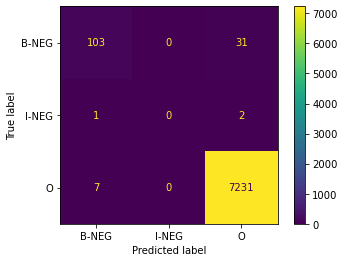

In [9]:

    df_train = pd.read_csv('SEM2012_training_data_with_features.csv')
    df_val = pd.read_csv('SEM2012_validation_data_with_features.csv')

    df_train = format_data(df_train)
    df_val = format_data(df_val)

    X_train, y_train, X_val, y_val = vectorize_split_data(df_train, df_val)

    clf_BAY, predictions_BAY = run_naive_bayes(X_train, y_train, X_val, y_val)
    df_val['prediction BAY'] = predictions_BAY

    evaluation(clf_BAY, X_val, y_val, predictions_BAY)




In [15]:
df_train = pd.read_csv('SEM2012_training_data_with_features.csv')
df_val = pd.read_csv('SEM2012_validation_data_with_features.csv')

df_train = format_data(df_train)
df_val = format_data(df_val)

X_train, y_train, X_val, y_val = vectorize_split_data(df_train, df_val)
clf_SVM, predictions_SVM = run_SVM(X_train, y_train, X_val, y_val)
df_val['prediction SVM'] = predictions_SVM
evaluation(clf_SVM, X_val, y_val, predictions_SVM)

Fitting the SVM model...


KeyboardInterrupt: 